In [511]:
import pandas as pd # to read csv file 
import numpy as np # to do math operations easily
from sklearn.preprocessing import LabelEncoder # to classify
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import make_scorer , accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import svm



In [512]:
df = pd.read_csv("data.csv",encoding="utf-8")

In [513]:
df.head()

,Position,Height,Weight,Age,Preferred Foot,Avg Ball,Avg Pass,Finishing,Speed,Kicking Power,Stamina,Avg Def,Weak Foot,Overall
0,CF,185,81,33,Right,77.0,66.0,86,74,79,71,53.666667,High,88
1,RWF,175,71,29,Left,80.5,70.0,82,84,70,78,50.666667,Medium,88
2,RWF,170,72,34,Left,85.5,80.5,85,68,72,66,50.000000,High,87
3,CF,178,73,23,Right,81.5,69.5,80,84,72,75,53.333333,High,87
4,CF,187,84,36,Right,77.0,68.0,80,74,82,66,43.333333,Very,86


In [514]:
le = LabelEncoder()

In [515]:
df.Position.unique()

array(['CF', 'RWF', 'GK', 'AMF', 'CB', 'DMF', 'LWF', 'LMF', 'SS', 'RB',
       'CMF', 'LB', 'RMF'], dtype=object)

In [516]:
df.shape[0]

17824

In [517]:
df = df[df.Position != 'GK']

In [518]:
df.reset_index(drop=True, inplace=True)

In [519]:
df.shape[0]

15652

KeyboardInterrupt: 

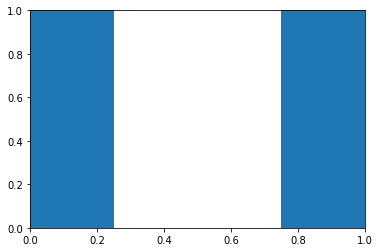

In [602]:
df["Position"] = df["Position"].replace(['CF'],"ST")
df["Position"] = df["Position"].replace(['SS'],"ST")

df["Position"] = df["Position"].replace(['CMF'],"CM")
df["Position"] = df["Position"].replace(['RMF'],"CM")
df["Position"] = df["Position"].replace(['LMF'],"CM")

df["Position"] = df["Position"].replace(['LB'],"LB-RB")
df["Position"] = df["Position"].replace(['RB'],"LB-RB")

df["Position"] = df["Position"].replace(['LWF'],"LWF-RWF")
df["Position"] = df["Position"].replace(['RWF'],"LWF-RWF")




In [521]:
df["Preferred Foot"] = le.fit_transform(df["Preferred Foot"])
df["Weak Foot"] = le.fit_transform(df["Weak Foot"])
df["Position"] = le.fit_transform(df["Position"])

In [548]:
df.Position.unique()

array([6, 5, 0, 1, 3, 2, 4])

In [522]:
df["Finishing"][df['Finishing'] > 75].count()

30

In [523]:
df.head()

,Position,Height,Weight,Age,Preferred Foot,Avg Ball,Avg Pass,Finishing,Speed,Kicking Power,Stamina,Avg Def,Weak Foot,Overall
0,6,185,81,33,1,77.0,66.0,86,74,79,71,53.666667,0,88
1,5,175,71,29,0,80.5,70.0,82,84,70,78,50.666667,1,88
2,5,170,72,34,0,85.5,80.5,85,68,72,66,50.000000,0,87
3,6,178,73,23,1,81.5,69.5,80,84,72,75,53.333333,0,87
4,6,187,84,36,1,77.0,68.0,80,74,82,66,43.333333,3,86


In [524]:
df["Age"] = pd.cut(df['Age'], bins=[15,22,28,33,45], labels=[0,1,2,3])

In [525]:
min(df['Height'])

155

In [526]:
max(df['Height'])

204

In [527]:
df["Height"] = pd.cut(df['Height'], bins=[150,165,175,185,210], labels=[0,1,2,3])

<AxesSubplot:>

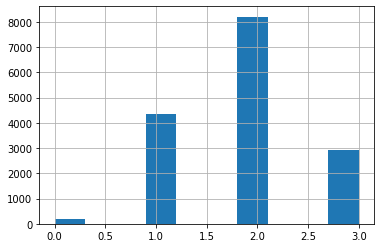

In [528]:
df["Height"].hist()

In [529]:
min(df["Avg Ball"])

42.0

In [530]:
max(df['Avg Ball'])

85.5

In [531]:
df["Avg Ball"] = pd.cut(df['Avg Ball'], bins=[40,57,65,73,100], labels=[0,1,2,3])

<AxesSubplot:>

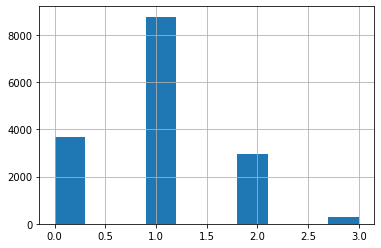

In [532]:
df['Avg Ball'].hist()

In [533]:
min(df['Weight'])

47

In [534]:
max(df['Weight'])

100

In [535]:
df['Weight']= pd.cut(df['Weight'], bins=[39,70,75,80,100], labels=[0,1,2,3])

In [536]:
df['Weight']

0        3
1        1
2        1
3        1
4        3
        ..
15647    0
15648    0
15649    0
15650    0
15651    0
Name: Weight, Length: 15652, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

In [537]:
min(df['Avg Pass'])

42.0

In [538]:
max(df['Avg Pass'])

84.0

In [539]:
df['Avg Pass'] = pd.cut(df['Avg Pass'], bins=[39,58,70,100], labels=[0,1,2])

<AxesSubplot:>

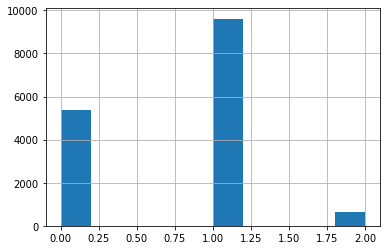

In [540]:
df['Avg Pass'].hist()

In [541]:
df.head()

,Position,Height,Weight,Age,Preferred Foot,Avg Ball,Avg Pass,Finishing,Speed,Kicking Power,Stamina,Avg Def,Weak Foot,Overall
0,6,2,3,2,1,3,1,86,74,79,71,53.666667,0,88
1,5,1,1,2,0,3,1,82,84,70,78,50.666667,1,88
2,5,1,1,3,0,3,2,85,68,72,66,50.000000,0,87
3,6,2,1,1,1,3,1,80,84,72,75,53.333333,0,87
4,6,3,3,3,1,3,1,80,74,82,66,43.333333,3,86


In [542]:
min(df['Finishing'])

40

In [543]:
max(df['Finishing'])

86

In [556]:
df['Finishing'] = pd.cut(df['Finishing'], bins=[39,58,70,100], labels=[0,1,2])

<AxesSubplot:>

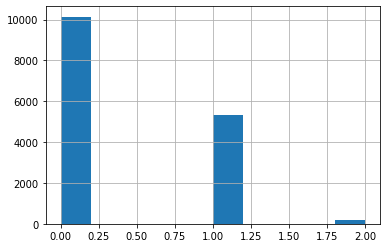

In [557]:
df['Finishing'].hist()

In [558]:
min(df['Speed'])

48

In [560]:
max(df['Speed'])

86

In [576]:
df["Speed"] = pd.cut(df['Speed'], bins=[39,55,65,75,100], labels=[0,1,2,3])

<AxesSubplot:>

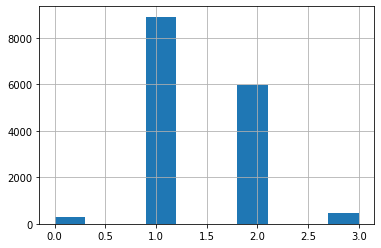

In [577]:
df["Speed"].hist()

In [579]:
df.head()

,Position,Height,Weight,Age,Preferred Foot,Avg Ball,Avg Pass,Finishing,Speed,Kicking Power,Stamina,Avg Def,Weak Foot,Overall
0,6,2,3,2,1,3,1,2,2,79,71,53.666667,0,88
1,5,1,1,2,0,3,1,2,3,70,78,50.666667,1,88
2,5,1,1,3,0,3,2,2,2,72,66,50.000000,0,87
3,6,2,1,1,1,3,1,2,3,72,75,53.333333,0,87
4,6,3,3,3,1,3,1,2,2,82,66,43.333333,3,86


<AxesSubplot:>

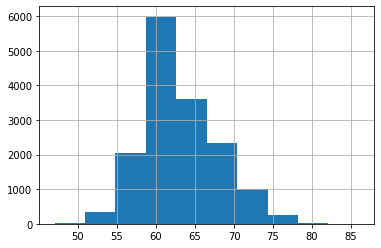

In [580]:
df['Kicking Power'].hist()

In [581]:
min(df['Kicking Power'])

47

In [582]:
max(df['Kicking Power'])

86

In [588]:
df['Kicking Power'] = pd.cut(df['Kicking Power'], bins=[45,60,70,100], labels=[0,1,2])

<AxesSubplot:>

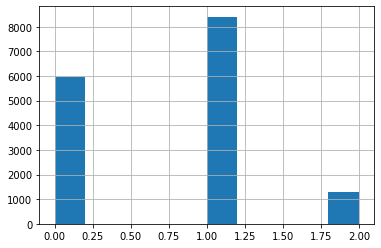

In [589]:
df['Kicking Power'].hist()

In [590]:
df.head()

,Position,Height,Weight,Age,Preferred Foot,Avg Ball,Avg Pass,Finishing,Speed,Kicking Power,Stamina,Avg Def,Weak Foot,Overall
0,6,2,3,2,1,3,1,2,2,2,71,53.666667,0,88
1,5,1,1,2,0,3,1,2,3,1,78,50.666667,1,88
2,5,1,1,3,0,3,2,2,2,2,66,50.000000,0,87
3,6,2,1,1,1,3,1,2,3,2,75,53.333333,0,87
4,6,3,3,3,1,3,1,2,2,2,66,43.333333,3,86


<AxesSubplot:>

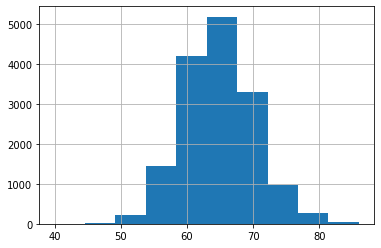

In [591]:
df['Stamina'].hist()

In [596]:
df['Stamina'] = pd.cut(df['Stamina'], bins=[45,63,75,100], labels=[0,1,2])

<AxesSubplot:>

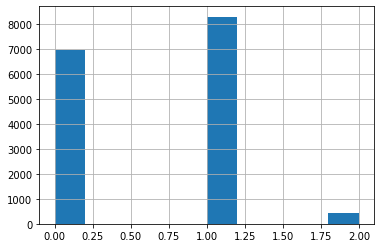

In [597]:
df['Stamina'].hist()

In [598]:
df.head()

,Position,Height,Weight,Age,Preferred Foot,Avg Ball,Avg Pass,Finishing,Speed,Kicking Power,Stamina,Avg Def,Weak Foot,Overall
0,6,2,3,2,1,3,1,2,2,2,1,53.666667,0,88
1,5,1,1,2,0,3,1,2,3,1,2,50.666667,1,88
2,5,1,1,3,0,3,2,2,2,2,1,50.000000,0,87
3,6,2,1,1,1,3,1,2,3,2,1,53.333333,0,87
4,6,3,3,3,1,3,1,2,2,2,1,43.333333,3,86


<AxesSubplot:>

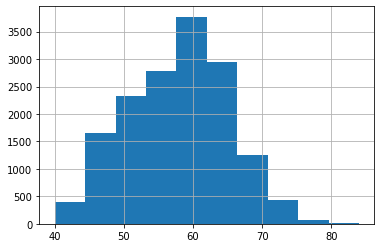

In [599]:
df['Avg Def'].hist()

In [600]:
min(df['Avg Def'])

40.0

In [601]:
max(df['Avg Def'])

84.0

In [ ]:
x = pd.cut(df['Avg Def'], bins=[39,63,75,100], labels=[0,1,2])